# Regression Lineaire exemple

Objectif : Automatiser le processus d'optimisation <strong><em>w</em></strong> et <strong><em>b</em></strong>

## Outils

- Numpy
- Matplotlib


In [39]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

## Problème 

Nous avons deux points de données suivantes

| Poids (kg) | Prix ($) |
|-----------|----------|
|  1        | 500      |
| 2         | 850      |

In [40]:
# Récuperation des données
x_train = np.array([1.0, 2.0]) # Features
y_train = np.array([500, 850])  # Labels

### Compute Cost

In [41]:
# Fonction de calcul du coût (erreur)
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w*x[i] + b
        cost = cost + (f_wb - y[i])**2
    
    total_cost = 1 / (2*m) * cost
    return total_cost

### Gradient Descent Algorithm


Nous avons besoins de trois fonctions :
- <em>compute_gradient</em>
- <em>compute_cost</em>
- <em>gradient_descent</em>

#### Compute_gradient

In [42]:
def compute_gradient(x,y,w,b):
    #number of examples training
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w*x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

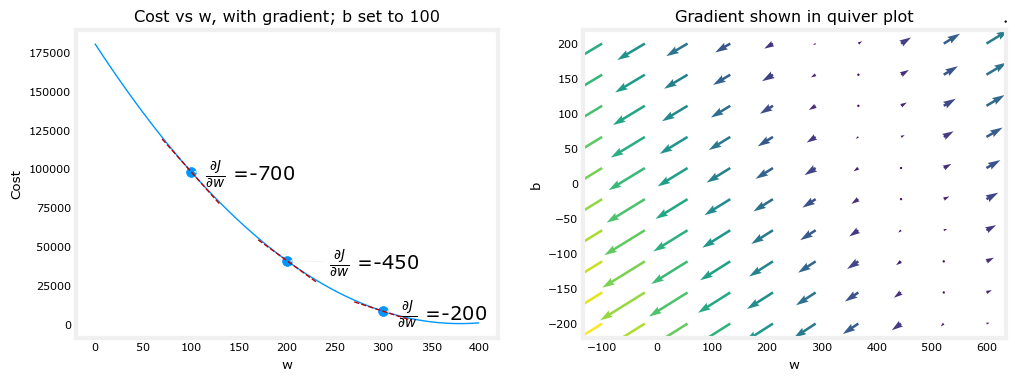

In [43]:
plt_gradients(x_train, y_train, compute_cost, compute_gradient)
plt.show()

#### Gradient Descent

In [44]:
def gradient_descent(x,y,w_in,b_in,alpha,num_iters, cost_function, gradient_function):

    #An array to store cost J and w's at each iteration primarily for graphing purposes
    j_history = []
    p_history = []
    w = w_in
    b = b_in

    for i in range(num_iters):
        #calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x,y,w,b)

        #update the weights w and b, using equation
        b = b - alpha*dj_db
        w = w - alpha*dj_dw
        

        #Save cost J at each iteration 
        if i < 100000: # don't plot the first 100,000 iterations
            j_history.append(cost_function(x,y,w,b)) # save the cost J
            p_history.append((w,b))                  # save the parameters w,b

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4} : Cost {j_history[-1]:0.2e}",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}",
                  f"w: {w: 0.3e}, b: {b: 0.3e}")
        
    return w, b, j_history, p_history # return the final parameters, cost history, and parameter history
        


In [46]:
# init parameters
w_init = 0.0
b_init = 0.0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2 # learning rate, in fact is 0.01
# run gradient_descent
w_final, b_final, j_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init,
                                                           tmp_alpha, iterations,
                                                           compute_cost, compute_gradient)
print(f"Final w: {w_final:8.4f}, Final b: {b_final:8.4f}")

Iteration    0 : Cost 2.27e+05 dj_dw: -1.100e+03, dj_db: -6.750e+02 w:  1.100e+01, b:  6.750e+00
Iteration 1000 : Cost 2.69e+01 dj_dw: -1.043e+00, dj_db:  1.687e+00 w:  3.357e+02, b:  1.731e+02
Iteration 2000 : Cost 6.26e+00 dj_dw: -5.027e-01, dj_db:  8.133e-01 w:  3.431e+02, b:  1.611e+02
Iteration 3000 : Cost 1.45e+00 dj_dw: -2.423e-01, dj_db:  3.920e-01 w:  3.467e+02, b:  1.554e+02
Iteration 4000 : Cost 3.38e-01 dj_dw: -1.168e-01, dj_db:  1.890e-01 w:  3.484e+02, b:  1.526e+02
Iteration 5000 : Cost 7.85e-02 dj_dw: -5.630e-02, dj_db:  9.109e-02 w:  3.492e+02, b:  1.512e+02
Iteration 6000 : Cost 1.82e-02 dj_dw: -2.714e-02, dj_db:  4.391e-02 w:  3.496e+02, b:  1.506e+02
Iteration 7000 : Cost 4.24e-03 dj_dw: -1.308e-02, dj_db:  2.116e-02 w:  3.498e+02, b:  1.503e+02
Iteration 8000 : Cost 9.84e-04 dj_dw: -6.305e-03, dj_db:  1.020e-02 w:  3.499e+02, b:  1.501e+02
Iteration 9000 : Cost 2.29e-04 dj_dw: -3.039e-03, dj_db:  4.918e-03 w:  3.500e+02, b:  1.501e+02
Final w: 349.9799, Final b: 15

#### Coût versus itérations de Gradient Descent

Text(0.5, 0, 'iteration step')

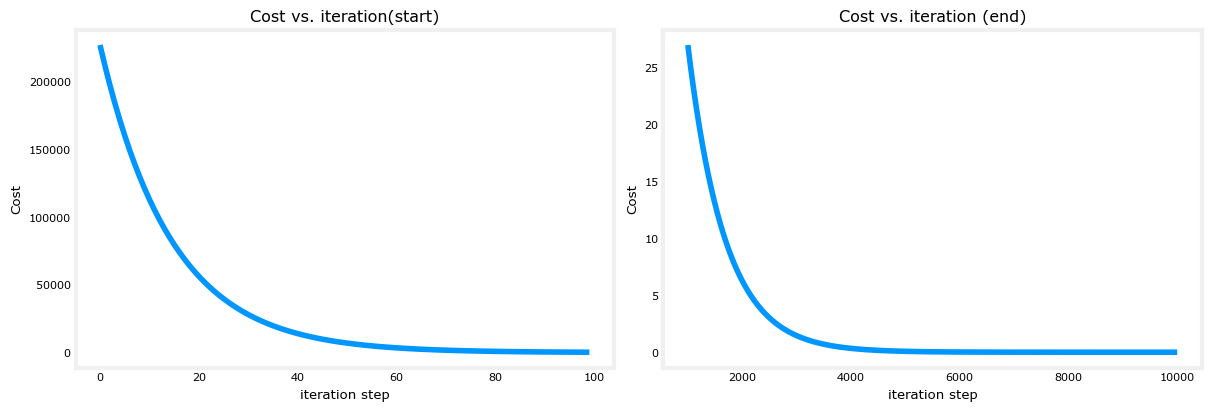

In [47]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(j_hist[:100])
ax2.plot(1000 + np.arange(len(j_hist[1000:])), j_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 

#### Predictions

In [49]:
print(f"1500 grammes d'or {w_final*1.5 + b_final:0.1f} $")
print(f"1200 grammes d'or {w_final*1.2 + b_final:0.1f} $")
print(f"1700 grammes d'or {w_final*1.7 + b_final:0.1f} $")

1500 grammes d'or 675.0 $
1200 grammes d'or 570.0 $
1700 grammes d'or 745.0 $


#### Graphique

Vous pouvez montrer la progression de l'algorythme Gradient Descent pendant son exécution en traçant le coût sur les itérations sur un courbe de contour du coût (w,b).

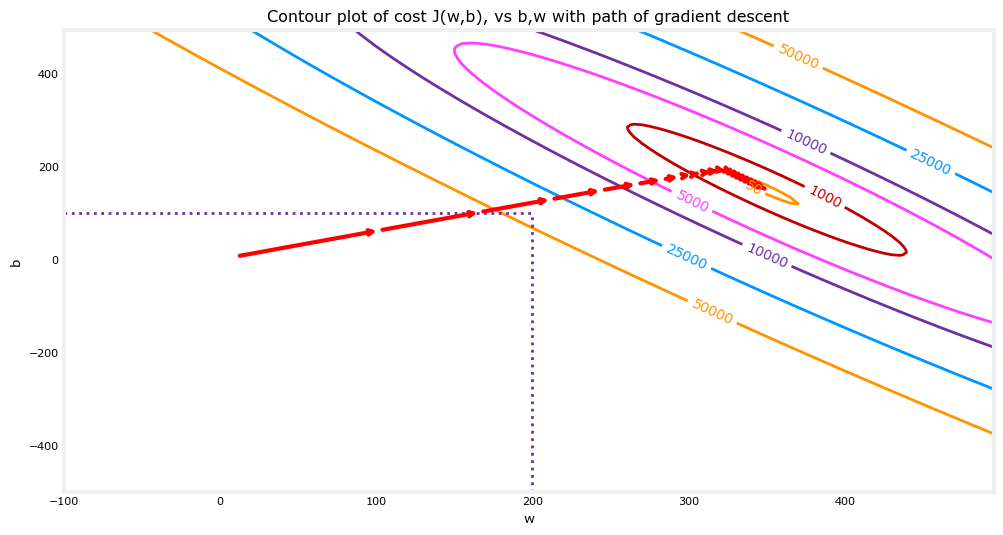

In [50]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)

#### Coût avec l'alpha trop large

In [58]:
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 10
tmp_alpha = 0.08
# run gradient descent
w_final, b_final, j_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

Iteration    0 : Cost 7.37e+05 dj_dw: -1.100e+03, dj_db: -6.750e+02 w:  8.800e+02, b:  5.400e+02
Iteration    1 : Cost 2.24e+06 dj_dw:  1.910e+03, dj_db:  1.185e+03 w: -6.480e+02, b: -4.080e+02
Iteration    2 : Cost 6.78e+06 dj_dw: -3.332e+03, dj_db: -2.055e+03 w:  2.018e+03, b:  1.236e+03
Iteration    3 : Cost 2.06e+07 dj_dw:  5.798e+03, dj_db:  3.587e+03 w: -2.621e+03, b: -1.634e+03
Iteration    4 : Cost 6.24e+07 dj_dw: -1.010e+04, dj_db: -6.240e+03 w:  5.462e+03, b:  3.358e+03
Iteration    5 : Cost 1.89e+08 dj_dw:  1.759e+04, dj_db:  1.088e+04 w: -8.611e+03, b: -5.342e+03
Iteration    6 : Cost 5.74e+08 dj_dw: -3.064e+04, dj_db: -1.893e+04 w:  1.590e+04, b:  9.805e+03
Iteration    7 : Cost 1.74e+09 dj_dw:  5.336e+04, dj_db:  3.298e+04 w: -2.679e+04, b: -1.658e+04
Iteration    8 : Cost 5.28e+09 dj_dw: -9.294e+04, dj_db: -5.744e+04 w:  4.757e+04, b:  2.937e+04
Iteration    9 : Cost 1.60e+10 dj_dw:  1.619e+05, dj_db:  1.000e+05 w: -8.193e+04, b: -5.066e+04


OverflowError: Python int too large to convert to C long

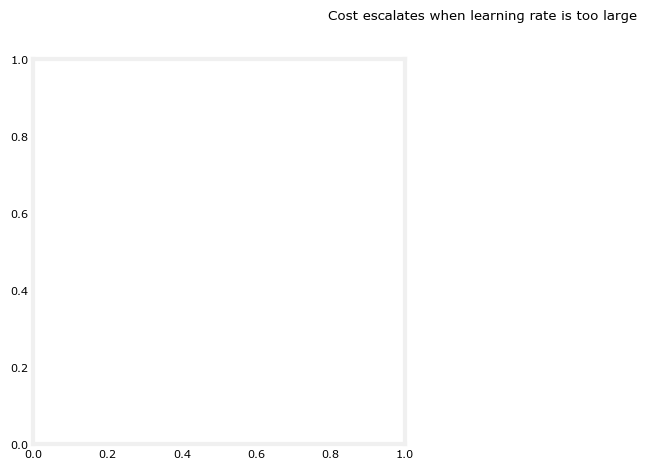

In [59]:
plt_divergence(p_hist, j_hist,x_train, y_train)
plt.show()